In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter('ignore')

In [6]:
ds = pd.read_csv('D:/3Kurs/1Sem/SS/Practice/rgr/data/weatherHistory.csv')

In [3]:
ds.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## First I will do business and data understanding

The dataset is taken from: https://www.kaggle.com/datasets/budincsevity/szeged-weather/code

### Attribute Information
1) time: The date and time of the observation, in ISO 8601 format.

2) summary: A brief description of the weather, such as "Clear" or "Rain".

3) Precip Type: The type of precipitation occurring at the time of the observation, such as "rain" or "snow".

4) temperature: The air temperature, in degrees Celsius, at the time of the observation.

5) Apparent Temperature: The temperature as perceived by a human, in degrees Celsius, at the time of the observation. This takes into account 
factors such as wind chill and humidity.

6) humidity: The relative humidity, as a percentage, at the time of the observation.

7) wind Speed: The wind speed, in meters per second, at the time of the observation.

8) wind Bearing: The direction that the wind is coming from, in degrees, at the time of the observation. 0° means the wind is coming from the 
north, 90° means the wind is coming from the east, and so on.

9) visibility: The average visibility, in kilometers, at the time of the observation.

10) loudCover: The percentage of the sky covered by clouds, at the time of the observation.

11) pressure: The sea-level air pressure, in hectopascals, at the time of the observation.

12) Daily Summary: A description of the daily weather, such as "Partly cloudy throughout the day."

In [4]:
print(ds.shape)
print(ds.nunique())

(96453, 12)
Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


In [5]:
r = 0
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum(), "\t\t",round((ds[x].isnull().sum()*100)/ds.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\nCount columns: ", r)

Precip Type 517 		 0.54 %

Count columns:  1


#### Only one clone has missing values, so all rows can be deleted and it will not affect the model itself.

### *Some statistics for numeric columns*.
**Count:** The number of non-zero (non-empty) values in the column.

**Mean:** The average value of the column.

**Std:** Standard deviation, which shows how well the values are distributed around the mean.

**min:** The smallest value in the column.

**25%:** The value at the 25th percentile (first quartile), which means that 25% of the values are smaller than this number.

**50%:** The value at the 50th percentile (median), which divides the data into two equal parts.

**75%:** The value at the 75th percentile (third quartile), which means that 75% of the values are less than this number.

**Max:** The largest value in the column.

In [6]:
ds.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### I'm going to modify the dataset a bit for better use in the future, it has such problems as column names and incorrect spelling

In [8]:
ds.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [9]:
ds_fixed = ds.copy()

In [10]:
ds_fixed.rename(columns={'Formatted Date': 'Formatted_Date'}, inplace=True)
ds_fixed.rename(columns={'Precip Type': 'Precip_Type'}, inplace=True)
ds_fixed.rename(columns={'Temperature (C)': 'Temperature'}, inplace=True)
ds_fixed.rename(columns={'Apparent Temperature (C)': 'Apparent_Temperature'}, inplace=True)
ds_fixed.rename(columns={'Wind Speed (km/h)': 'Wind_Speed'}, inplace=True)
ds_fixed.rename(columns={'Wind Bearing (degrees)': 'Wind_Bearing'}, inplace=True)
ds_fixed.rename(columns={'Visibility (km)': 'Visibility'}, inplace=True)
ds_fixed.rename(columns={'Loud Cover': 'Loud_Cover'}, inplace=True)
ds_fixed.rename(columns={'Pressure (millibars)': 'Pressure'}, inplace=True)
ds_fixed.rename(columns={'Daily Summary': 'Daily_Summary'}, inplace=True)


ds_fixed

,Formatted_Date,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [11]:
ds_fixed.to_csv('D:/3Kurs/1Sem/SS/Practice/rgr/data/weatherHistory_fixed.csv')

ds = pd.read_csv('D:/3Kurs/1Sem/SS/Practice/rgr/data/weatherHistory_fixed.csv')

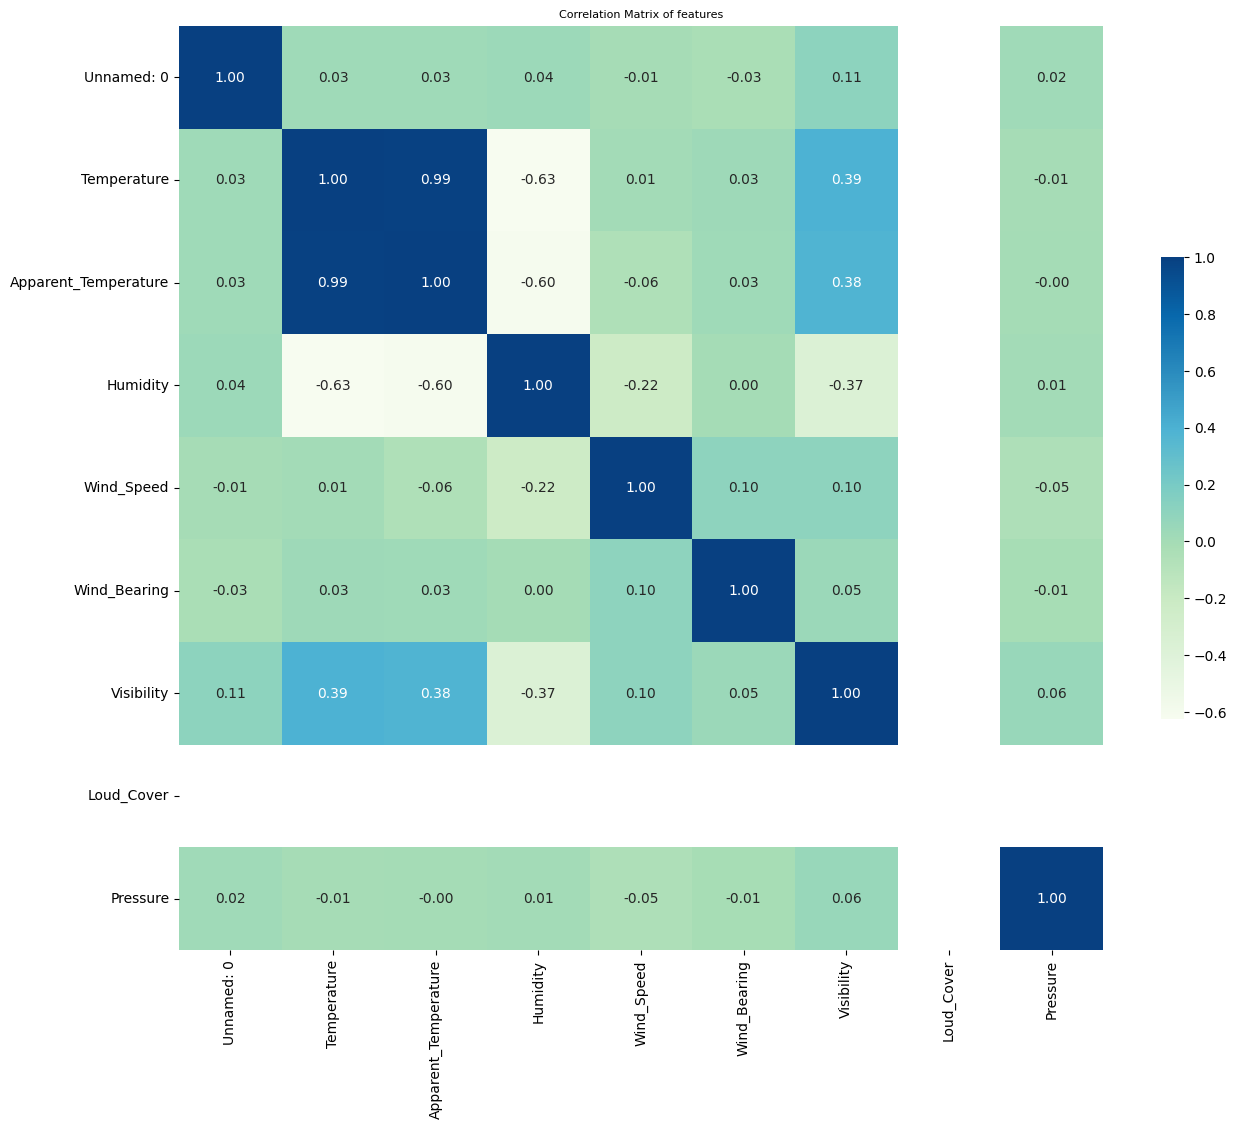

In [12]:
numeric_columns = ds.select_dtypes(include=['number']).columns



plt.rcParams["figure.figsize"] = (15,12)
correlation_matrix = ds[numeric_columns].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

In [13]:
ds["Loud_Cover"].value_counts()

Loud_Cover
0.0    96453
Name: count, dtype: int64

#### From this correlation table, we can conclude that the columns “Temperature” and “Apparent_Temperature” are dependent on each other, so one of them can be deleted, for example, “Apparent_Temperature” because it directly depends on “Temperature”.
#### You can also see that the “Loud_Cover” column does not appear in the correlation matrix and if you look at the number of unique values, there is only one, i.e. “0.0”, so it should be deleted.

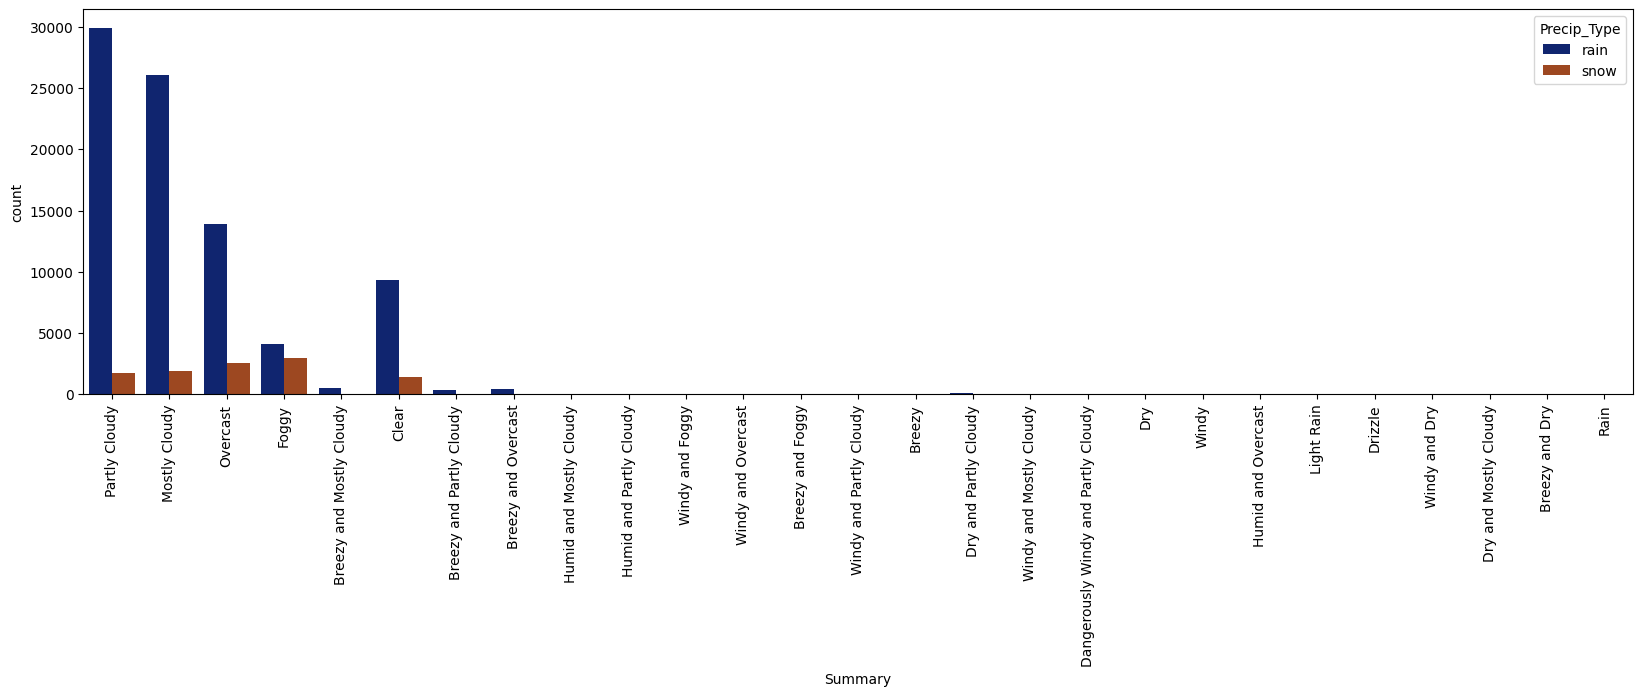

In [14]:
plt.rcParams["figure.figsize"] = (20, 5)
sns.countplot(x="Summary", hue="Precip_Type", data=ds, palette="dark")
plt.xticks(rotation=90)

plt.show()

#### Also, in two columns, such as “Summary” and “Daily Summary”, the information is common and similar to each other, so one of them can be deleted and the other can be converted.

#### There is also common information in such columns as “Summary” and “Precip Type”, and more specifically, the value of “Rain”, so you can use the values from both columns when converting data to the future “Rain” column.

### Percentage Distribution of Summary by their number

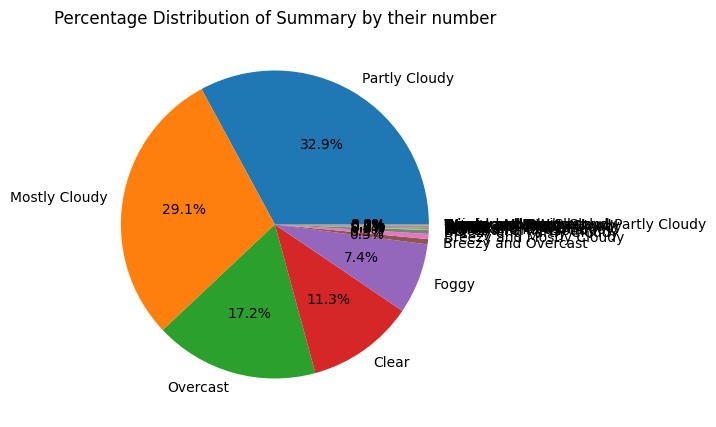

In [15]:
# Percentage distribution of flats by number of rooms
room_distribution = ds['Summary'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
room_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage Distribution of Summary by their number')
plt.ylabel('')  # Прибираємо підпис на осі Y
plt.show()


In [16]:
ds['Summary'].value_counts(normalize=True)

Summary
Partly Cloudy                          0.329000
Mostly Cloudy                          0.291271
Overcast                               0.172073
Clear                                  0.112905
Foggy                                  0.074109
Breezy and Overcast                    0.005474
Breezy and Mostly Cloudy               0.005350
Breezy and Partly Cloudy               0.004002
Dry and Partly Cloudy                  0.000892
Windy and Partly Cloudy                0.000695
Light Rain                             0.000653
Breezy                                 0.000560
Windy and Overcast                     0.000467
Humid and Mostly Cloudy                0.000415
Drizzle                                0.000404
Breezy and Foggy                       0.000363
Windy and Mostly Cloudy                0.000363
Dry                                    0.000353
Humid and Partly Cloudy                0.000176
Dry and Mostly Cloudy                  0.000145
Rain                            

In [17]:
unique_values_Summary = ds['Summary'].unique()
unique_values_Summary_df = pd.DataFrame(unique_values_Summary, columns=['Summary'])
unique_values_Summary_df.head(28)

,Summary
0,Partly Cloudy
1,Mostly Cloudy
2,Overcast
3,Foggy
4,Breezy and Mostly Cloudy
5,Clear
6,Breezy and Partly Cloudy
7,Breezy and Overcast
8,Humid and Mostly Cloudy
9,Humid and Partly Cloudy


#### The diagram shows that there are a variety of weather conditions on a particular day, and their number is not the same - 27, and of those 27, most are repeated, and their number is reduced to 13, so you will need to implement a function that not only converts categorical columns to numerical columns, but also creates 13 columns where the unit will be assigned only to common features.

### Percentage Distribution of Precip Type by their number

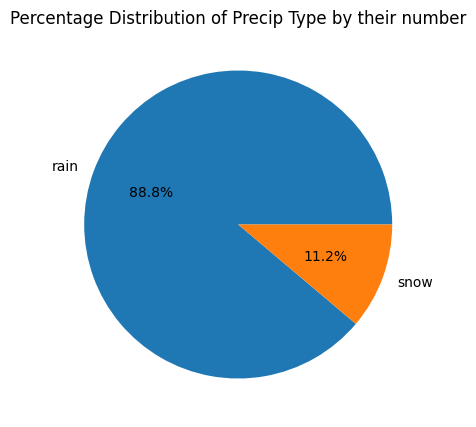

In [18]:
# Percentage distribution of flats by number of rooms
room_distribution = ds['Precip_Type'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
room_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage Distribution of Precip Type by their number')
plt.ylabel('')  # Прибираємо підпис на осі Y
plt.show()


### Plot Wind Speed, Temperature and Humidity distributions

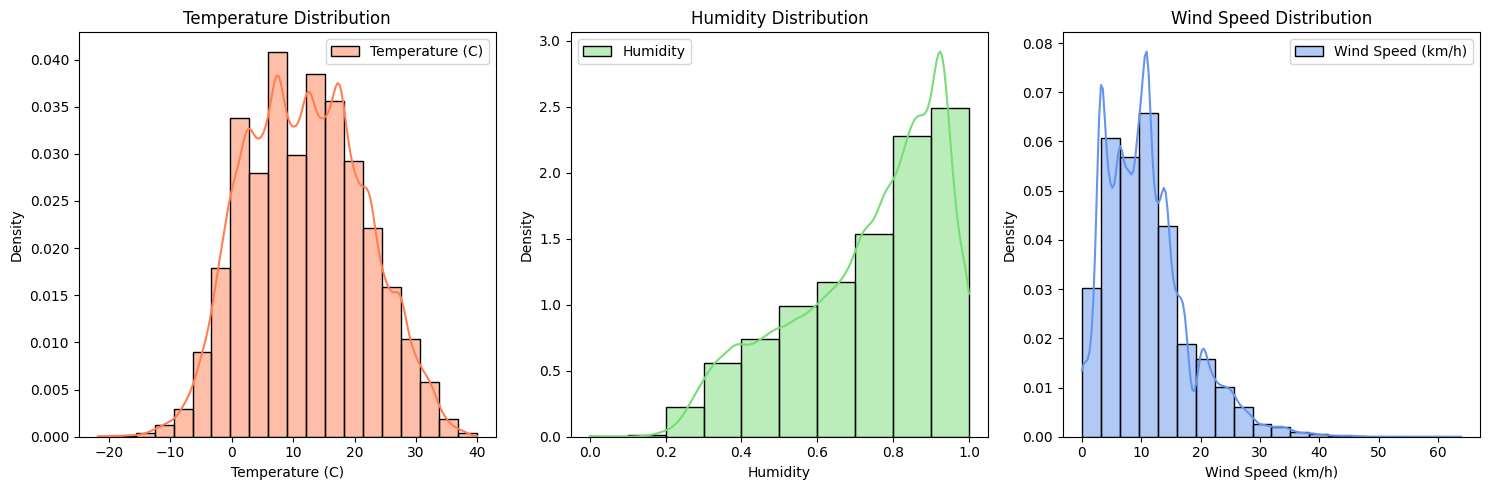

In [19]:
plt.figure(figsize=(15, 5))

# Plot Wind Speed distribution
plt.subplot(1, 3, 3)  # Subplot 3 out of 3
sns.histplot(data=ds, x="Wind_Speed", kde=True, color='#6495ED', label='Wind Speed (km/h)', bins=20, stat="density")
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Density')
plt.title('Wind Speed Distribution')
plt.legend()

# Plot Temperature distribution
plt.subplot(1, 3, 1)  # Subplot 1 out of 3
sns.histplot(data=ds, x="Temperature", kde=True, color='#FF7F50', label='Temperature (C)', bins=20, stat="density")
plt.xlabel('Temperature (C)')
plt.ylabel('Density')
plt.title('Temperature Distribution')
plt.legend()

# Plot Humidity distribution
plt.subplot(1, 3, 2)  # Subplot 2 out of 3
sns.histplot(data=ds, x="Humidity", kde=True, color='#77DD77', label='Humidity', bins=10, stat="density")
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.title('Humidity Distribution')
plt.legend()

plt.tight_layout()

plt.show()

#### The temperature variable followed a normal distribution, with most days experiencing average temperatures between 5°C and 15°C. Humidity exhibited a positively skewed distribution, indicating a right-tailed data set with most values concentrated on the lower end. The city was notably humid, as over 45% of the days had humidity levels exceeding 80%. Wind speed also showed a skewed distribution, with more than 56% of the days recording wind speeds between 5 km/h and 15 km/h.

In [20]:
# Filter to include only rows where 'Summary' is one of the specified weather conditions and select specific columns.
sub_ds = ds.loc[ds.Summary.isin(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Clear','Foggy']), 
                     ['Summary', 'Temperature', 'Apparent_Temperature', 'Humidity', 
                      'Wind_Speed', 'Wind_Bearing', 'Visibility', 
                      'Pressure']]
sub_ds.head(5)

,Summary,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure
0,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


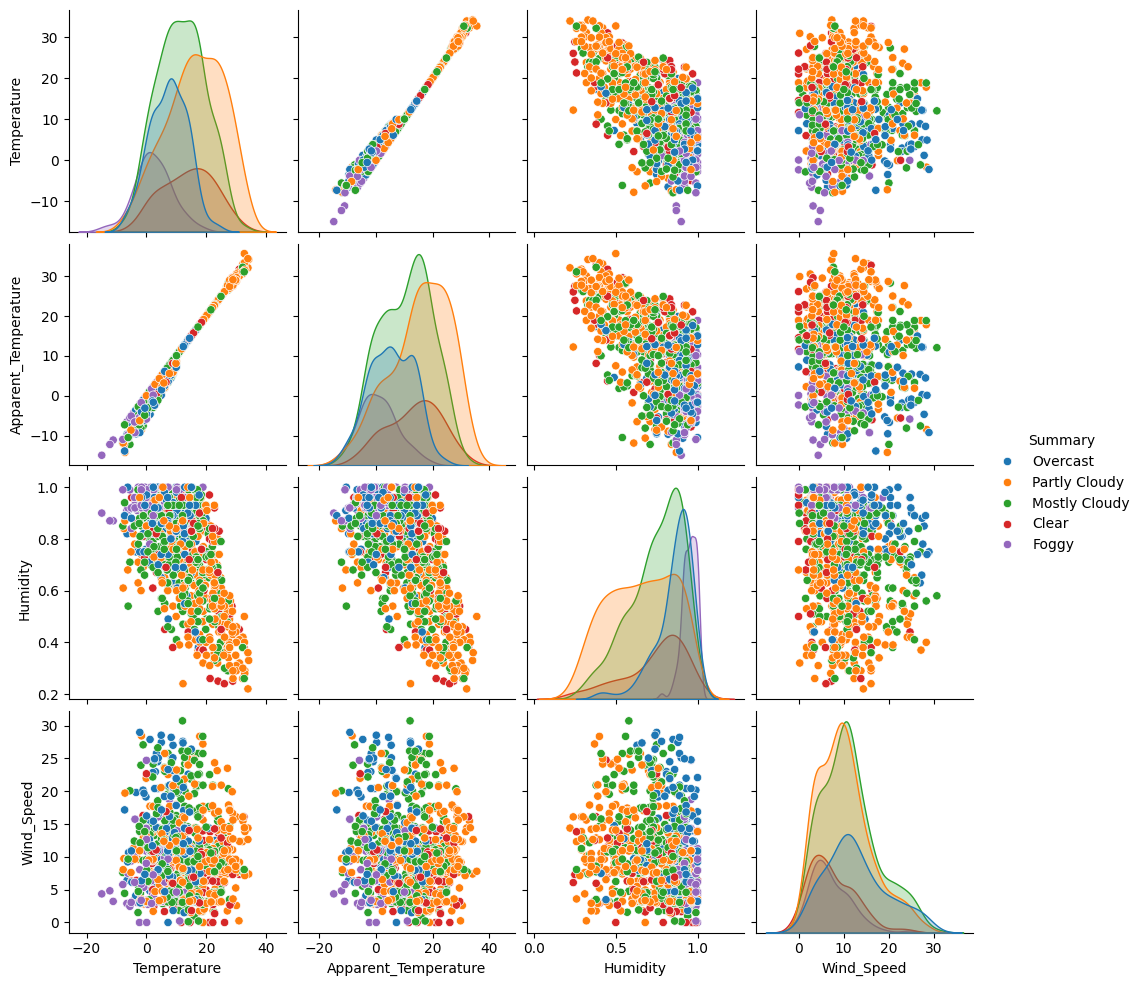

In [21]:
# Choose sample size
sample_size = 1000
if sample_size > len(sub_ds):
    sample_size = len(sub_ds)
    
# Take random sample with fixed random state    
sample = sub_ds.sample(sample_size, random_state=1)

sns.pairplot(sample, vars=['Temperature', 'Apparent_Temperature', 'Humidity', 'Wind_Speed'], hue='Summary')
plt.show()

In [22]:
# Group  by 'Summary', calculate max, min, and mean for selected columns
grouped_data = ds.groupby(by='Summary')[['Temperature',
                                         'Humidity']] \
                 .agg(['max', 'min', 'mean']) \
                 .sort_values(by='Summary', axis=0, ascending=False)

# Count the occurrences of each unique value in 'Summary'
summary_counts = ds['Summary'].value_counts()

# Sort the grouped data based on the frequency of the 'Summary' values.
grouped_data_sorted = grouped_data.loc[summary_counts.index]
grouped_data_sorted.head(5)

Temperature                       Humidity               
                      max        min       mean      max  min      mean
Summary                                                                
Partly Cloudy   39.588889 -20.555556  16.024782      1.0  0.0  0.648571
Mostly Cloudy   37.155556 -16.894444  12.629334      1.0  0.0  0.725069
Overcast        33.644444 -16.111111   7.516502      1.0  0.0  0.837232
Clear           39.905556 -20.000000  11.925109      1.0  0.0  0.729708
Foggy           23.661111 -21.822222   1.464035      1.0  0.0  0.950765

#### Binning enhances model accuracy by simplifying continuous data into discrete categories. It reduces complexity, manages outliers, and improves interpretability. For instance, binning "ApparentTemperature(C)" into categories like "below 20°C," "20-25°C," and "above 25°C" can reveal clearer relationships, leading to more accurate models.


### Visulizing Trends Over Time

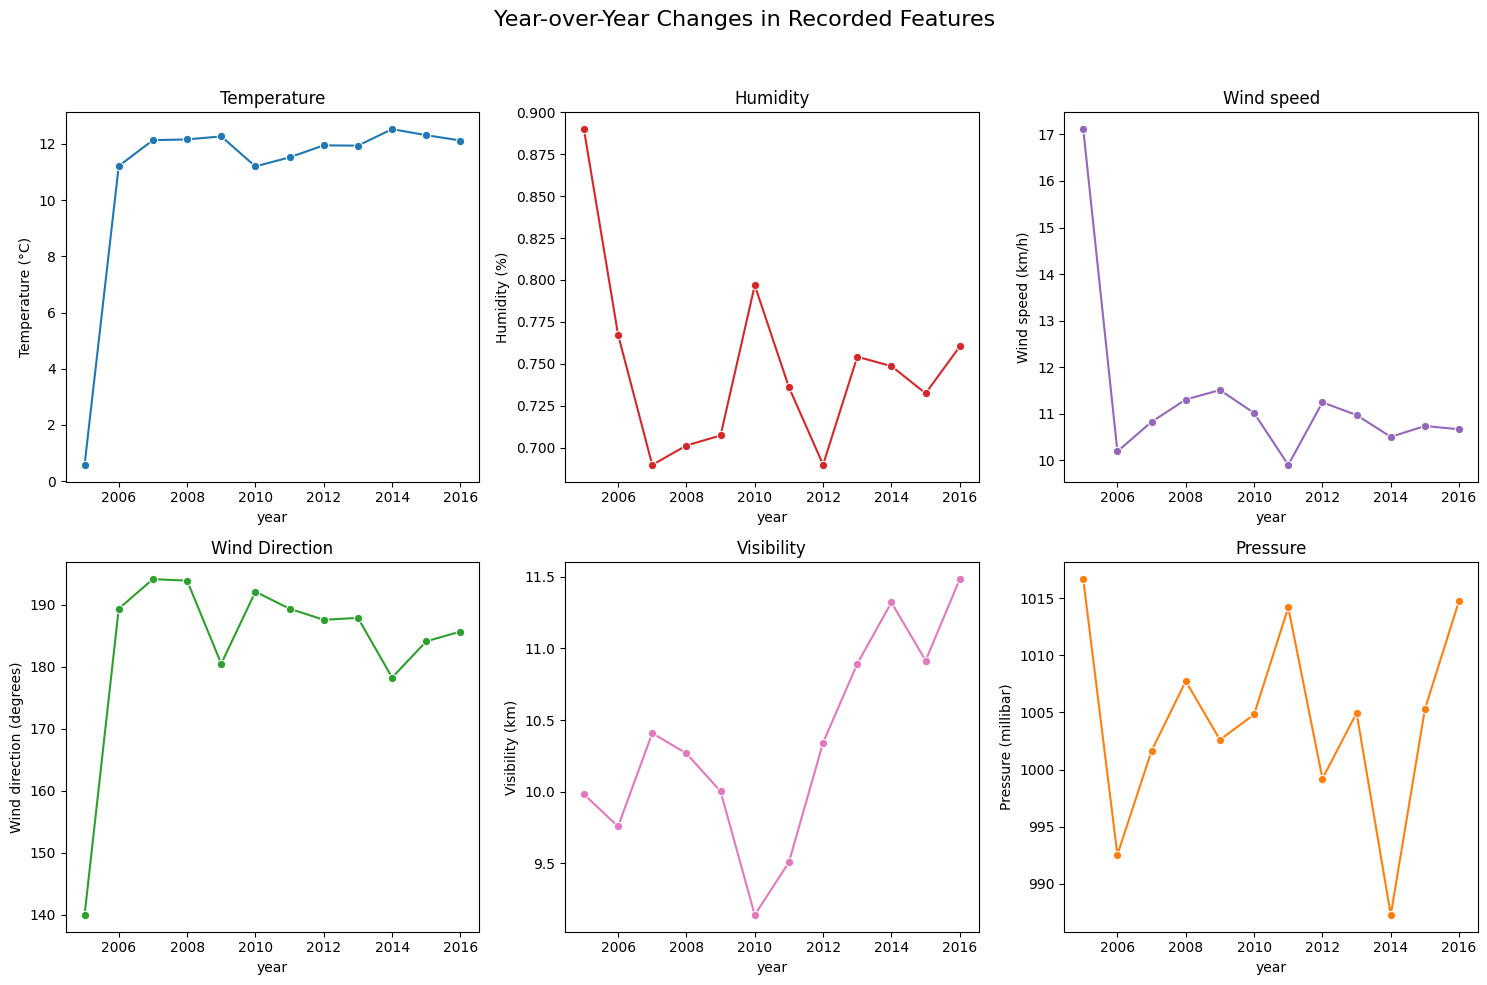

In [23]:
# Convert date to datetime format and set it as an index
ds['Formatted_Date'] = pd.to_datetime(ds['Formatted_Date'], utc=True)
ds.set_index('Formatted_Date', inplace=True)

# Adding a month column
ds['year'] = ds.index.year


ds.dropna(inplace=True)


# Grouping data by month and calculating average values
monthly_data = ds.groupby('year')[[
    'Temperature', 'Humidity', 'Wind_Speed', 
    'Wind_Bearing', 'Visibility', 'Pressure'
]].mean().reset_index()

# Building graphs
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Figure title
fig.suptitle('Year-over-Year Changes in Recorded Features', fontsize=16)

# Temperature
sns.lineplot(data=monthly_data, x='year', y='Temperature', ax=ax[0, 0], color='tab:blue', marker='o')
ax[0, 0].set_title('Temperature')
ax[0, 0].set_ylabel('Temperature (°C)')
ax[0, 0].set_xlabel('year')

# Humidity
sns.lineplot(data=monthly_data, x='year', y='Humidity', ax=ax[0, 1], color='tab:red', marker='o')
ax[0, 1].set_title('Humidity')
ax[0, 1].set_ylabel('Humidity (%)')
ax[0, 1].set_xlabel('year')

# Wind speed
sns.lineplot(data=monthly_data, x='year', y='Wind_Speed', ax=ax[0, 2], color='tab:purple', marker='o')
ax[0, 2].set_title('Wind speed')
ax[0, 2].set_ylabel('Wind speed (km/h)')
ax[0, 2].set_xlabel('year')

# Wind direction
sns.lineplot(data=monthly_data, x='year', y='Wind_Bearing', ax=ax[1, 0], color='tab:green', marker='o')
ax[1, 0].set_title('Wind Direction')
ax[1, 0].set_ylabel('Wind direction (degrees)')
ax[1, 0].set_xlabel('year')

# Visibility
sns.lineplot(data=monthly_data, x='year', y='Visibility', ax=ax[1, 1], color='tab:pink', marker='o')
ax[1, 1].set_title('Visibility')
ax[1, 1].set_ylabel('Visibility (km)')
ax[1, 1].set_xlabel('year')

# Pressure
sns.lineplot(data=monthly_data, x='year', y='Pressure', ax=ax[1, 2], color='tab:orange', marker='o')
ax[1, 2].set_title('Pressure')
ax[1, 2].set_ylabel('Pressure (millibar)')
ax[1, 2].set_xlabel('year')

# Alignment of graph elements
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()